In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from jupyter_dash import JupyterDash
from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

In [12]:
df1 = pd.read_csv('passes.csv')

df2 = pd.read_csv('take_ons.csv')

df3 = pd.read_csv('shots.csv')

df4 = pd.read_csv('def_actions.csv')

In [3]:
df1['x_start'] = df1['x_start']*1.2
df1['y_start'] = df1['y_start']*.8
df1['x_end'] = df1['x_end']*1.2
df1['y_end'] = df1['y_end']*.8

In [4]:
df2['x_start'] = df2['x_start']*1.2
df2['y_start'] = df2['y_start']*.8

In [5]:
df3['x_start'] = df3['x_start']*1.2
df3['y_start'] = df3['y_start']*.8
df3['x_end'] = df3['x_end']*1.2
df3['y_end'] = df3['y_end']*.8

In [13]:
df4['x_start'] = df4['x_start']*1.2
df4['y_start'] = df4['y_start']*.8

In [6]:
df1['beginning'] = np.sqrt(np.square(120-df1['x_start'])+np.square(40-df1['y_start']))
df1['end'] = np.sqrt(np.square(120-df1['x_end'])+np.square(40-df1['y_end']))
df1['progressive'] = [(df1['end'][x]) / (df1['beginning'][x]) < .75 for x in range(len(df1.beginning))]

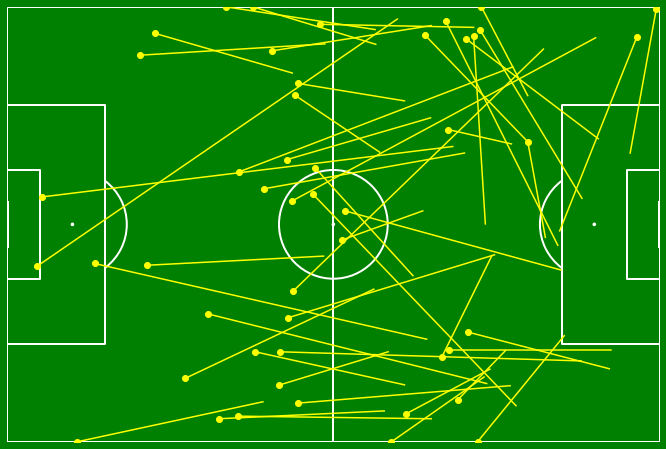

In [7]:
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('green')
ax.patch.set_facecolor('green')

pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white',
              figsize=(13.5, 8),constrained_layout=True, tight_layout=False)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for x in range(len(df1['x_start'])):
    if df1['team'][x] == 'Argentina':
        if df1['game_num'][x] == 'f24-4-2013-731830-eventdetails.xml':
            if df1['progressive'][x] == True:
                if df1['outcome'][x] == 1:
                    plt.plot((df1['x_start'][x],df1['x_end'][x]),(df1['y_start'][x],df1['y_end'][x]),color='yellow')
                    plt.scatter(df1['x_start'][x],df1['y_start'][x],color='yellow')

plt.xlim(0,120)
plt.ylim(0,80);

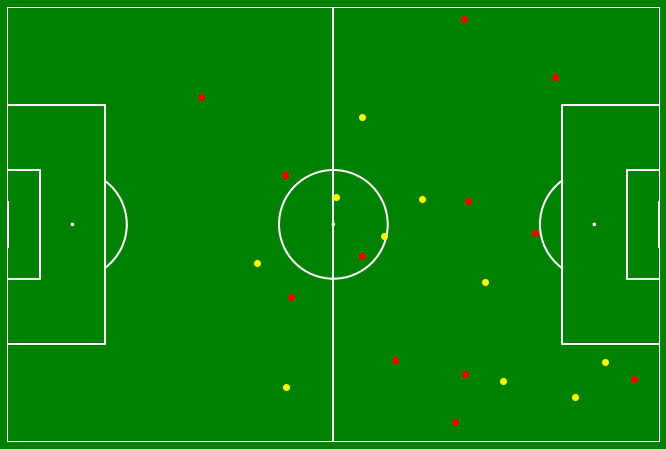

In [8]:
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('green')
ax.patch.set_facecolor('green')

pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white',
              figsize=(13.5, 8),constrained_layout=True, tight_layout=False)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for x in range(len(df2['x_start'])):
    if df2['team'][x] == 'Argentina':
        if df2['game_num'][x] == 'f24-4-2013-731830-eventdetails.xml':
            if df2['outcome'][x] == 1:
                plt.scatter(df2['x_start'][x],df2['y_start'][x],color='yellow')
            else:
                plt.scatter(df2['x_start'][x],df2['y_start'][x],color='red')                

plt.xlim(0,120)
plt.ylim(0,80);

In [9]:
df3[df3['team']=='Germany']

,Unnamed: 0,team,half,min,x_start,y_start,outcome,x_end,y_end,game_num
58,58,Germany,1,7,86.52,25.76,Miss,120.0,45.44,f24-4-2013-731779-eventdetails.xml
61,61,Germany,1,39,104.76,53.44,Miss,120.0,43.36,f24-4-2013-731779-eventdetails.xml
62,62,Germany,2,50,112.20,46.00,Miss,120.0,40.96,f24-4-2013-731779-eventdetails.xml
137,137,Germany,1,25,83.64,42.40,Miss,120.0,45.52,f24-4-2013-731795-eventdetails.xml
139,139,Germany,1,46,92.04,34.16,Miss,120.0,54.48,f24-4-2013-731795-eventdetails.xml
...,...,...,...,...,...,...,...,...,...,...
945,945,Germany,1,25,108.60,38.40,Goal,120.0,42.08,f24-4-2013-731827-eventdetails.xml
946,946,Germany,1,28,104.28,42.08,Goal,120.0,42.56,f24-4-2013-731827-eventdetails.xml
947,947,Germany,2,68,109.56,37.36,Goal,120.0,38.32,f24-4-2013-731827-eventdetails.xml
948,948,Germany,2,78,111.24,55.44,Goal,120.0,42.40,f24-4-2013-731827-eventdetails.xml


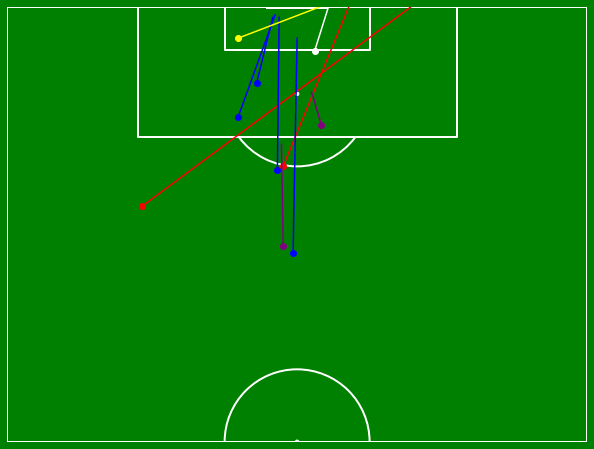

In [10]:
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('green')
ax.patch.set_facecolor('green')

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='green', line_color='white',
              figsize=(13.5, 8),constrained_layout=True, tight_layout=False, half=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for x in range(len(df3['x_start'])):
    if df3['team'][x] == 'Germany':
        if df3['game_num'][x] == 'f24-4-2013-731830-eventdetails.xml':
            if df3['outcome'][x] == 'Goal':
                plt.scatter(df3['y_start'][x],df3['x_start'][x],color='yellow')
                plt.plot((df3['y_start'][x],df3['y_end'][x]),(df3['x_start'][x],df3['x_end'][x]),color='yellow')
            elif df3['outcome'][x] == 'Miss':
                plt.scatter(df3['y_start'][x],df3['x_start'][x],color='red')  
                plt.plot((df3['y_start'][x],df3['y_end'][x]),(df3['x_start'][x],df3['x_end'][x]),color='red')
            elif df3['outcome'][x] == 'Save':
                plt.scatter(df3['y_start'][x],df3['x_start'][x],color='blue') 
                plt.plot((df3['y_start'][x],df3['y_end'][x]),(df3['x_start'][x],df3['x_end'][x]),color='blue')    
            elif df3['outcome'][x] == 'Block':
                plt.scatter(df3['y_start'][x],df3['x_start'][x],color='purple') 
                plt.plot((df3['y_start'][x],df3['y_end'][x]),(df3['x_start'][x],df3['x_end'][x]),color='purple')                 
            elif df3['outcome'][x] == 'Woodwork':
                plt.scatter(df3['y_start'][x],df3['x_start'][x],color='white')
                plt.plot((df3['y_start'][x],df3['y_end'][x]),(df3['x_start'][x],df3['x_end'][x]),color='white')
                
plt.xlim(80,0)
plt.ylim(60,120);

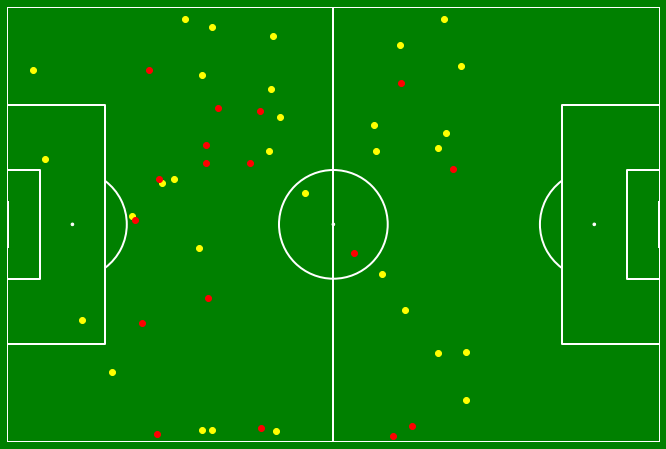

In [15]:
fig,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('green')
ax.patch.set_facecolor('green')

pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white',
              figsize=(13.5, 8),constrained_layout=True, tight_layout=False)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for x in range(len(df4['x_start'])):
    if df4['team'][x] == 'Germany':
        if df4['game_num'][x] == 'f24-4-2013-731830-eventdetails.xml':
            if df4['type_def'][x] == 'Tackle':
                plt.scatter(df4['x_start'][x],df4['y_start'][x],color='yellow')
            elif df4['type_def'][x] == 'Interception':
                plt.scatter(df4['x_start'][x],df4['y_start'][x],color='red')                

plt.xlim(0,120)
plt.ylim(0,80);